<a href="https://colab.research.google.com/github/IA2021UR/entregable-1-joferne/blob/main/5_deteccion_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTACIÓN DE LIBRERÍAS** 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

**2. CARGA DE DATOS** 

In [2]:
!unzip ia2021.zip

Archive:  ia2021.zip
  inflating: test.csv                
  inflating: train.csv               


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**3. ALGORITMOS A UTILIZAR** 

Los siguientes algoritmos los he obtenido de la página:

https://ichi.pro/es/eliminando-valores-atipicos-de-los-datos-usando-python-y-pandas-180001119792428

In [4]:
def get_iqr_values(df_in, col_name):    
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

Los siguientes algoritmos son de mi cosecha.

In [5]:
def input_mean(df_in, col_name, array, precision):
    mean = df_in.apply(np.mean)[col_name]
    for i in range(0,len(array),precision):
        df_in.loc[df_in['Localizador']==array[i],col_name] = mean

def return_outliers(df_in, col_name):
  _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
  df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
  return df_outliers

def evalua(clasificador,testData,testLabels):
  num = 0
  for i in range(0,len(clasificador.predict(testData))):
    if clasificador.predict(testData)[i] == testLabels[i]:
      num = num + 1
  print('Cambian ' + str(len(testLabels) - num) + ' de ' + str(len(testLabels)))

**4. ANÁLISIS DE OUTLIERS** 

Observando el diagrama de cajas vemos los valores atípicos. De esta forma vamos a examinar el número de outliers para cada descriptor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


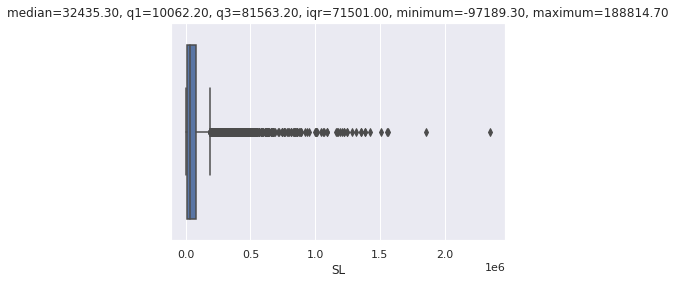

1164
422


In [7]:
box_and_whisker(df_train,'SL')
print(count_outliers(df_train,'SL'))
print(count_outliers(df_test,'SL'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


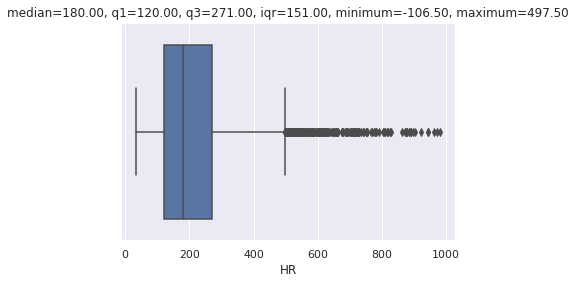

494
219


In [8]:
box_and_whisker(df_train,'HR')
print(count_outliers(df_train,'HR'))
print(count_outliers(df_test,'HR'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


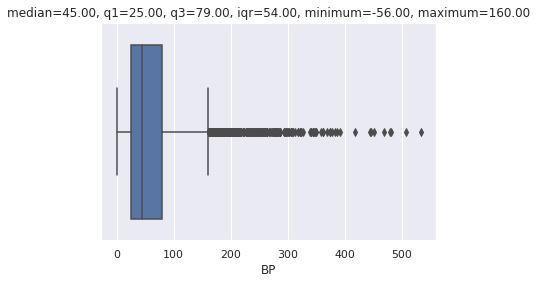

471
187


In [9]:
box_and_whisker(df_train,'BP')
print(count_outliers(df_train,'BP'))
print(count_outliers(df_test,'BP'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


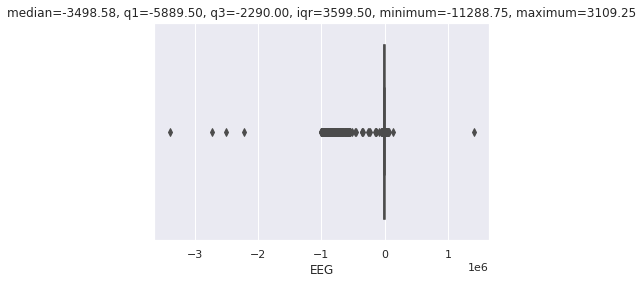

857
340


In [10]:
box_and_whisker(df_train,'EEG')
print(count_outliers(df_train,'EEG'))
print(count_outliers(df_test,'EEG'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


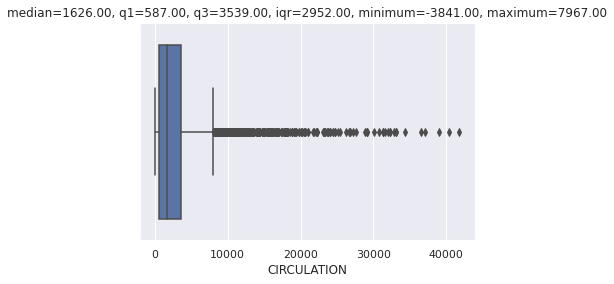

989
349


In [11]:
box_and_whisker(df_train,'CIRCULATION')
print(count_outliers(df_train,'CIRCULATION'))
print(count_outliers(df_test,'CIRCULATION'))

Una primera solución que vamos a hacer es eliminar directamente todos los outliers.

In [12]:
df_noout = remove_outliers(df_train,'HR')
df_noout = remove_outliers(df_train,'BP')
df_noout = remove_outliers(df_train,'EEG')
df_noout = remove_outliers(df_train,'CIRCULATION')
df_noout = remove_outliers(df_train,'SL')

Observamos como el número ha bajado.

In [13]:
print(count_outliers(df_train,'SL'))
print(count_outliers(df_noout,'SL'))

1164
795


In [14]:
print(count_outliers(df_train,'BP'))
print(count_outliers(df_noout,'BP'))

471
471


In [15]:
print(count_outliers(df_train,'HR'))
print(count_outliers(df_noout,'HR'))

494
141


In [16]:
print(count_outliers(df_train,'EEG'))
print(count_outliers(df_noout,'EEG'))

857
501


In [17]:
print(count_outliers(df_train,'CIRCULATION'))
print(count_outliers(df_noout,'CIRCULATION'))

989
367


A ver qué tal predice el conjunto test.

In [25]:
X_noout =  df_noout.values[:,:-1]
Y_noout =  df_noout.values[:,-1]
(trainData_noout, testData_noout, trainLabels_noout, testLabels_noout) = train_test_split(X_noout,Y_noout,test_size=0.15, random_state=42)

X =  df_train.values[:,:-1]
Y =  df_train.values[:,-1]
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.15, random_state=42)

In [26]:
for k in range(2,11,1):
    forest= RandomForestClassifier(min_samples_split=k,random_state=84)
    forest.fit(trainData_noout, trainLabels_noout)
    score = forest.score(testData,testLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=91.11%
k=3, precisión=90.67%
k=4, precisión=89.94%
k=5, precisión=88.50%
k=6, precisión=87.00%
k=7, precisión=86.00%
k=8, precisión=85.06%
k=9, precisión=84.22%
k=10, precisión=84.00%


Los resultados son asombrosamente buenos. Sin embargo es un espejismo, ya que lo tenemos sobreajustado.

Otra opción sería imputar los outliers por la media.

In [37]:
df_train['Localizador'] = [i for i in range(0,df_train.shape[0])]

In [38]:
a = np.array(return_outliers(df_train,'BP')['Localizador'])
b = np.array(return_outliers(df_train,'SL')['Localizador'])
c = np.array(return_outliers(df_train,'HR')['Localizador'])
d = np.array(return_outliers(df_train,'EEG')['Localizador'])
e = np.array(return_outliers(df_train,'CIRCULATION')['Localizador'])

In [39]:
input_mean(df_train,'BP',a,1)
input_mean(df_train,'SL',b,1)
input_mean(df_train,'HR',c,1)
input_mean(df_train,'EEG',d,1)
input_mean(df_train,'CIRCULATION',e,1)

In [40]:
df_train = df_train.drop('Localizador',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


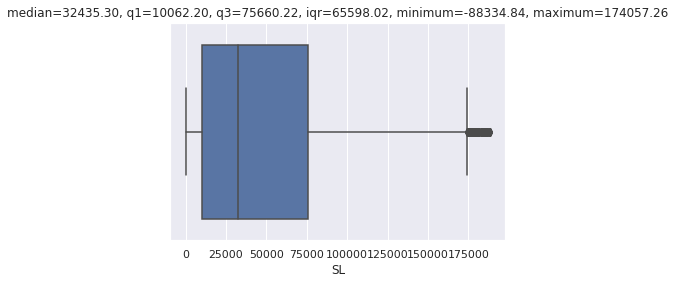

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


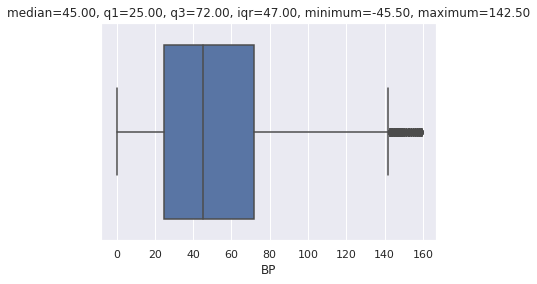

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


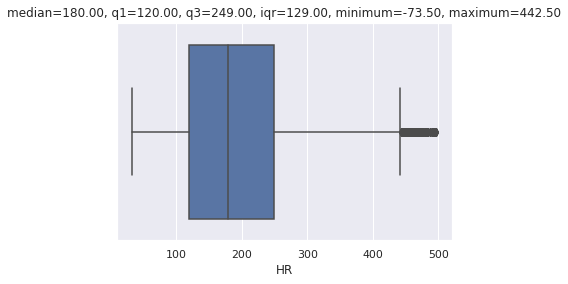

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


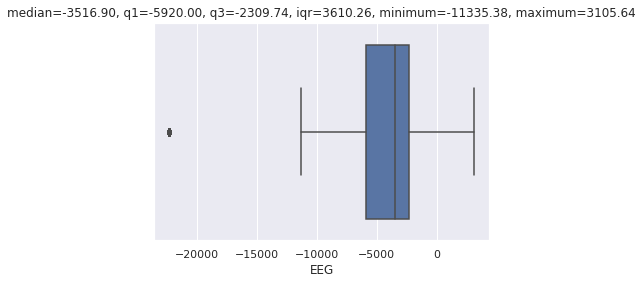

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


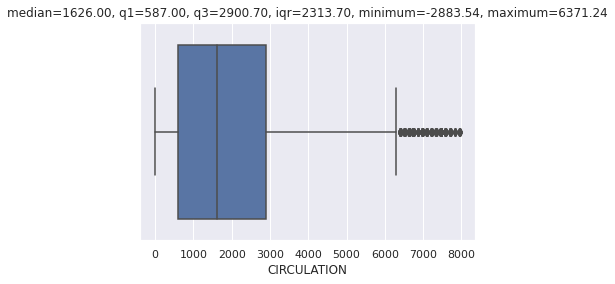

In [42]:
box_and_whisker(df_train,'SL')
box_and_whisker(df_train,'BP')
box_and_whisker(df_train,'HR')
box_and_whisker(df_train,'EEG')
box_and_whisker(df_train,'CIRCULATION')

Es tremendamente notable como cambia el diagrama de cajas. La zona próxima a la media y la mediana aumenta considerablemente de tamaño. Veamos qué tales resultados nos ofrece este método.

In [44]:
X =  df_train.values[:,:-1]
Y =  df_train.values[:,-1]
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.15, random_state=42)

In [46]:
for k in range(2,11,1):
    forest= RandomForestClassifier(min_samples_split=k,random_state=84)
    forest.fit(trainData, trainLabels)
    score = forest.score(testData,testLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=72.89%
k=3, precisión=73.17%
k=4, precisión=72.89%
k=5, precisión=73.17%
k=6, precisión=73.00%
k=7, precisión=72.94%
k=8, precisión=72.56%
k=9, precisión=72.94%
k=10, precisión=73.17%


In [49]:
mms = MinMaxScaler()
trainData_norm = mms.fit_transform(trainData)
testData_norm = mms.transform(testData)

stdsc = StandardScaler()
trainData_std = stdsc.fit_transform(trainData)
testData_std = stdsc.transform(testData)

trainData_norm_std = stdsc.fit_transform(trainData_norm)
testData_norm_std = stdsc.transform(testData_norm)

In [51]:
for k in range(2,11,1):
    forest= RandomForestClassifier(min_samples_split=k,criterion='entropy',random_state=84)
    forest.fit(trainData_std, trainLabels)
    score = forest.score(testData_std,testLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=73.44%
k=3, precisión=73.06%
k=4, precisión=73.28%
k=5, precisión=73.67%
k=6, precisión=73.17%
k=7, precisión=73.22%
k=8, precisión=73.22%
k=9, precisión=73.06%
k=10, precisión=72.89%


No nos mejora el modelo original, pero ya no lo tenemos sobreajustado.

La última prueba que vamos a hacer es eliminando los outliers comunes en todos los descriptores.

In [59]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [60]:
df_train['Localizador'] = [i for i in range(0,df_train.shape[0])]

In [61]:
a = set(np.array(return_outliers(df_train,'BP')['Localizador']))
b = set(np.array(return_outliers(df_train,'SL')['Localizador']))
c = set(np.array(return_outliers(df_train,'HR')['Localizador']))
d = set(np.array(return_outliers(df_train,'EEG')['Localizador']))
inter = a & b & c & d
inter_array = [a for a in inter]
df_train_noout = df_train.drop(inter_array).copy()
df_train_noout = df_train_noout.drop('Localizador',axis=1)

In [62]:
X =  df_train_noout.values[:,:-1]
Y =  df_train_noout.values[:,-1]
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.15, random_state=42)

In [64]:
for k in range(2,11,1):
    forest= RandomForestClassifier(min_samples_split=k,criterion='entropy',random_state=84)
    forest.fit(trainData, trainLabels)
    score = forest.score(testData,testLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=73.44%
k=3, precisión=73.16%
k=4, precisión=73.21%
k=5, precisión=73.10%
k=6, precisión=72.82%
k=7, precisión=73.16%
k=8, precisión=73.21%
k=9, precisión=73.94%
k=10, precisión=72.71%


In [65]:
mms = MinMaxScaler()
trainData_norm = mms.fit_transform(trainData)
testData_norm = mms.transform(testData)

stdsc = StandardScaler()
trainData_std = stdsc.fit_transform(trainData)
testData_std = stdsc.transform(testData)

trainData_norm_std = stdsc.fit_transform(trainData_norm)
testData_norm_std = stdsc.transform(testData_norm)

In [66]:
for k in range(2,11,1):
    forest= RandomForestClassifier(min_samples_split=k,criterion='entropy',random_state=84)
    forest.fit(trainData_std, trainLabels)
    score = forest.score(testData_std,testLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=2, precisión=73.49%
k=3, precisión=72.66%
k=4, precisión=73.38%
k=5, precisión=72.94%
k=6, precisión=73.05%
k=7, precisión=73.44%
k=8, precisión=73.38%
k=9, precisión=73.88%
k=10, precisión=72.60%


Lamentablemente con la detección de outliers no hemos conseguido mejorar el modelo. Tal vez sea porque hay algo mal hecho, o porque realmente los randomForest lidian realmente bien con ellos.